In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# EDA on Test Data

In [5]:
df = pd.read_csv('test.csv')

In [6]:
df.describe()

,Unnamed: 0,county_fips,state_fips,covid_19_confirmed_cases,cat__social_distancing_total_grade_A,cat__social_distancing_total_grade_A-,cat__social_distancing_total_grade_B,cat__social_distancing_total_grade_B+,cat__social_distancing_total_grade_B-,cat__social_distancing_total_grade_C,...,num__age_75_79,num__age_80_84,num__age_85_or_higher,num__immigrant_student_ratio,num__lagged_covid_19_confirmed_cases_15,num__lagged_covid_19_confirmed_cases_30,num__lagged_covid_19_confirmed_cases_45,num__rolling_covid_19_confirmed_cases_15,num__rolling_covid_19_confirmed_cases_30,num__rolling_covid_19_confirmed_cases_45
count,112032.000000,112032.000000,112032.000000,112032.000000,112032.0,112032.000000,112032.000000,112032.000000,112032.000000,112032.000000,...,112032.000000,112032.000000,112032.000000,112032.000000,112032.000000,112032.000000,112032.000000,112032.000000,112032.000000,112032.000000
mean,56015.500000,29944.667095,29.850471,17.568463,0.0,0.000045,0.001330,0.000071,0.009765,0.134720,...,0.265761,0.360468,0.257177,0.029820,0.105714,0.006626,0.006123,0.021597,0.002480,0.000583
std,32340.997016,15097.842413,15.087144,73.739123,0.0,0.006680,0.036445,0.008450,0.098335,0.341426,...,0.118593,0.121096,0.104599,0.058619,0.006904,0.017424,0.009930,0.014818,0.013667,0.006996
min,0.000000,1003.000000,1.000000,-96.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.094759,-0.023622,-0.030246,0.018080,0.000000,0.000000
25%,28007.750000,18107.000000,18.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.333333,0.250000,0.000000,0.104416,0.004374,0.005601,0.018080,0.000000,0.000000
50%,56015.500000,29092.000000,29.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.285714,0.333333,0.250000,0.002561,0.104517,0.004374,0.005601,0.018596,0.000000,0.000000
75%,84023.250000,42119.000000,42.000000,12.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.285714,0.333333,0.250000,0.039469,0.105120,0.004666,0.005601,0.020354,0.000956,0.000000
max,112031.000000,56037.000000,56.000000,5361.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.643698,1.567804,1.030620,0.645344,0.652262,0.607712


In [9]:
df.isnull().sum()

Unnamed: 0                                  0
date                                        0
county_fips                                 0
county_name                                 0
state_fips                                  0
                                           ..
num__lagged_covid_19_confirmed_cases_30     0
num__lagged_covid_19_confirmed_cases_45     0
num__rolling_covid_19_confirmed_cases_15    0
num__rolling_covid_19_confirmed_cases_30    0
num__rolling_covid_19_confirmed_cases_45    0
Length: 89, dtype: int64

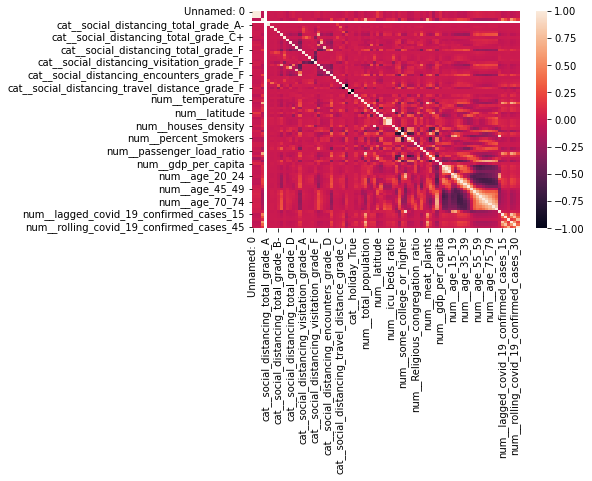

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

In [11]:
regions = {
    'West': ['Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Southwest': ['California', 'Nevada', 'Utah', 'Colorado'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky',
              'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina',
              'Tennessee', 'Virginia', 'West Virginia'],
    'NewEngland': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York',
                   'New Jersey', 'Pennsylvania'],
    'Utopia': ['Alaska', 'Hawaii']
}

In [12]:
West = df[df['state_name'].isin(regions['West'])]
Southwest = df[df['state_name'].isin(regions['Southwest'])]
Midwest = df[df['state_name'].isin(regions['Midwest'])]
NewEngland = df[df['state_name'].isin(regions['NewEngland'])]
South = df[df['state_name'].isin(regions['South'])]
Utopia = df[df['state_name'].isin(regions['Utopia'])]

In [40]:
regions_data = {
    'West': West,
    'Southwest': Southwest,
    'Midwest': Midwest,
    'South': South,
    'Utopia': Utopia,
    'New England': NewEngland
}


# Finding Outliers

In [44]:
# outliers for all features
def find_outliers(df):
    outliers = pd.DataFrame()  
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            q1, q3 = np.percentile(df[column], [25, 75])
            iqr = q3 - q1
            lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            column_outliers = df[(df[column] < lower) | (df[column] > upper)]
            column_outliers['Feature'] = column
            outliers = pd.concat([outliers, column_outliers], axis=0)
    return outliers

outliers = {}

for region, region_df in regions_data.items():
    outliers[region] = find_outliers(region_df)

all_outliers = pd.concat(outliers.values(), ignore_index=True)


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_outliers['Feature'] = column
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_11639/3594580233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [49]:
all_outliers.nunique()

Unnamed: 0                                  109164
date                                            48
county_fips                                   2334
county_name                                   1133
state_fips                                      49
                                             ...  
num__lagged_covid_19_confirmed_cases_45        285
num__rolling_covid_19_confirmed_cases_15      3153
num__rolling_covid_19_confirmed_cases_30      3623
num__rolling_covid_19_confirmed_cases_45      2089
Feature                                         83
Length: 90, dtype: int64

In [50]:
West_outliers = all_outliers[all_outliers['state_name'].isin(regions['West'])]
Southwest_outliers = all_outliers[all_outliers['state_name'].isin(regions['Southwest'])]
Midwest_outliers = all_outliers[all_outliers['state_name'].isin(regions['Midwest'])]
NewEngland_outliers = all_outliers[all_outliers['state_name'].isin(regions['NewEngland'])]
South_outliers = all_outliers[all_outliers['state_name'].isin(regions['South'])]
Utopia_outliers = all_outliers[all_outliers['state_name'].isin(regions['Utopia'])]

In [53]:
print("West:", West_outliers.shape)
print("Southwest:", Southwest_outliers.shape)
print("Midwest:", Midwest_outliers.shape)
print("NewEngland:", NewEngland_outliers.shape)
print("South:", South_outliers.shape)
print("Utopia:", Utopia_outliers.shape)

West: (119508, 90)
Southwest: (26067, 90)
Midwest: (224702, 90)
NewEngland: (46751, 90)
South: (169179, 90)
Utopia: (1173, 90)


In [65]:
# outliers for only confirmed cases

outliers = []

for region_name, region_data in regions_data.items():
    cases = region_data['covid_19_confirmed_cases']

    q1, q3 = np.percentile(cases, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    outlier = cases[(cases < lower) | (cases > upper)]

    outlier_region = [{'Region': region_name, 'Outlier': value}
                     for value in outlier]
    outliers.extend(outlier_region)

outliers_cases = pd.DataFrame(outliers)



In [66]:
outliers_cases

,Region,Outlier
0,West,36.0
1,West,27.0
2,West,119.0
3,West,26.0
4,West,29.0
...,...,...
13271,New England,393.0
13272,New England,441.0
13273,New England,38.0
13274,New England,35.0


In [70]:
outliers_cases.value_counts()

Region     Outlier
Midwest    22.0       204
           23.0       199
           21.0       173
           24.0       147
South      39.0       142
                     ... 
Southwest  426.0        1
           429.0        1
           430.0        1
           432.0        1
West       5361.0       1
Length: 1705, dtype: int64

In [71]:
outliers_cases.to_csv('outliers_covid_cases.csv', index=False)


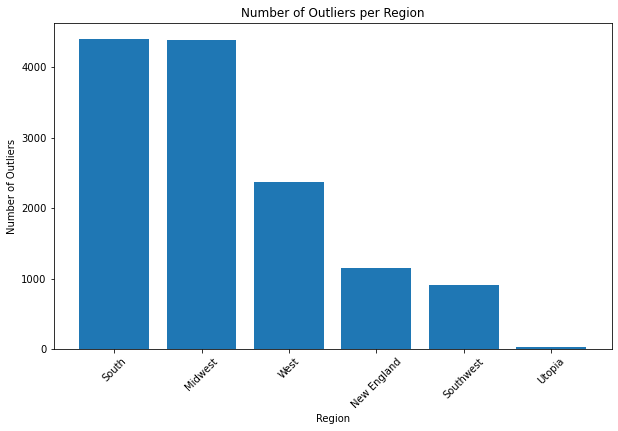

In [72]:
import matplotlib.pyplot as plt

outlier_counts = outliers_cases['Region'].value_counts().reset_index()
outlier_counts.columns = ['Region', 'Outlier Count']

plt.figure(figsize=(10, 6))
plt.bar(outlier_counts['Region'], outlier_counts['Outlier Count'])
plt.xlabel('Region')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Region')
plt.xticks(rotation=45) 
plt.show()

In [73]:
for region_name, region_data in regions_data.items():
    cases = region_data['covid_19_confirmed_cases']

    q1, q3 = np.percentile(cases, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    region_data['covid_19_confirmed_cases'] = region_data['covid_19_confirmed_cases'].apply(
        lambda x: x if lower <= x <= upper else np.nan
    )

In [75]:
region_data.to_csv('test_clean.csv', index=False)
